# DATASET FIFA
Abel Stanley - 13517068 <br>
Samantha Olivia Tandri - 13517123

**Dependencies:**

In [4]:
import numpy as numpy
import pandas as pandas
import matplotlib.pyplot as plotter
import pylab
from scipy.stats import binom

**Import relevant dataset:**

In [5]:
dataframe = pandas.read_csv("fifa.csv")

**<<<<<<<<<<<<<<<<<<<<<<<<<< Describing Dataset <<<<<<<<<<<<<<<<<<<<<<<<<<** 

In [10]:
print("--------------------------Data Description---------------------------\n")
dataframe.describe(include = 'all')

--------------------------Data Description---------------------------



Name           Age Nationality
count          18207  18207.000000       18207
unique         17194           NaN         164
top     J. Rodríguez           NaN     England
freq              11           NaN        1662
mean             NaN     25.122206         NaN
std              NaN      4.669943         NaN
min              NaN     16.000000         NaN
25%              NaN     21.000000         NaN
50%              NaN     25.000000         NaN
75%              NaN     28.000000         NaN
max              NaN     45.000000         NaN

In [11]:
print("\n------------------------------Mode:--------------------------------\n")
print( "Age Mode:               : ", dataframe["Age"].mode().values[0] )
print( "Nationality Mode        : ", dataframe["Nationality"].mode().values[0] )
print( "From the whole dataset  : \n", dataframe.mode() )
print( "\n--------------------Median for Numeric Columns:-------------------\n")
print( "Age: ", dataframe["Age"].median())
print( "------------------------------Variance:-----------------------------\n")
print( "Age Variance :", dataframe.var().values[0] )
print( "\n------------------------------Skew--------------------------------\n")
print( "Age: ", dataframe.skew().values[0] )
print( "\n-----------------------------Kurtosis-----------------------------\n")
print( "Age: ", dataframe.kurtosis().values[0] )


------------------------------Mode:--------------------------------

Age Mode:               :  21
Nationality Mode        :  England
From the whole dataset  : 
            Name  Age Nationality
0  J. Rodríguez   21     England

--------------------Median for Numeric Columns:-------------------

Age:  25.0
------------------------------Variance:-----------------------------

Age Variance : 21.80836494657141

------------------------------Skew--------------------------------

Age:  0.3917641387687474

-----------------------------Kurtosis-----------------------------

Age:  -0.4595135539307731


**<<<<<<<<<<<<<<<<<<<<<<< Plot Histogram for dataset >>>>>>>>>>>>>>>>>>>>>>>**<br>
*------------------------------------------------1. Age Histogram:------------------------------------------------*

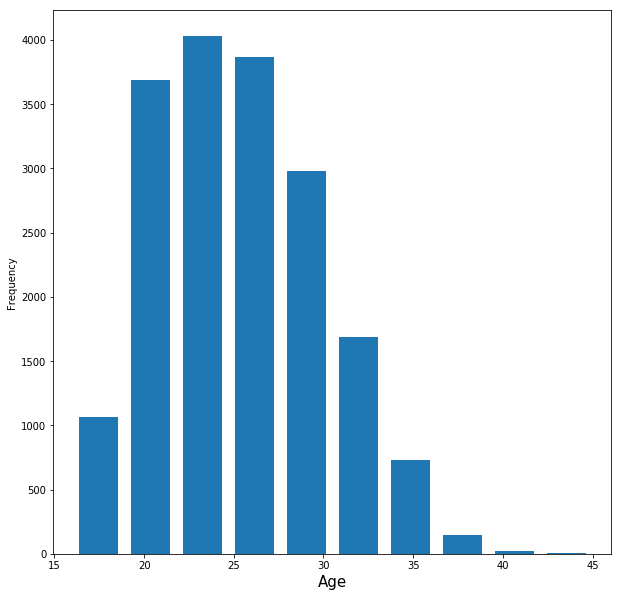

<Figure size 432x288 with 0 Axes>

In [4]:
# Determines what to plot in the chart:
dataframe["Age"].plot(kind="hist", rwidth =0.75, figsize= (10,10))
# Customizing the chart:
plotter.xlabel("Age", fontsize=15)
# Show the chart:
plotter.show()
# Reset the plotter:
plotter.clf()

*--------------------------------------------2. Nationality Histogram:--------------------------------------------*

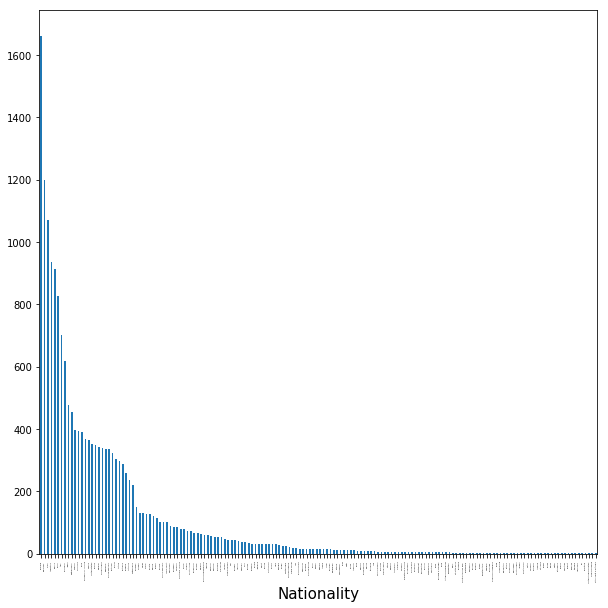

<Figure size 432x288 with 0 Axes>

In [5]:
# Determines what to plot in the chart:
    # Because Nationality is not a numeric type, plot into bar instead of histogram
dataframe["Nationality"].value_counts().plot(kind="bar", figsize = (10,10))
# Customizing the chart:
plotter.xticks(fontsize=2)
plotter.xlabel("Nationality", fontsize=15)
# Miscellaneous:
#print(dataframe['Nationality'].nunique())  #<- Check berapa banyak negara sih di column 'Nationality'
# Show the chart:
plotter.show()
# Reset the plotter:
plotter.clf()

**<<<<<<<<<<<<<<<<<<<<<<<<<< Plot Box for Dataset  >>>>>>>>>>>>>>>>>>>>>>>>>>**

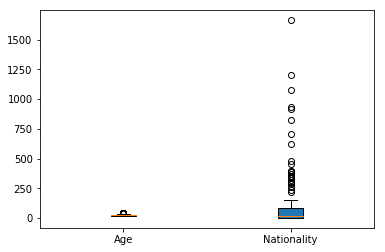

<Figure size 432x288 with 0 Axes>

In [40]:
# Determines what to plot in the chart:
# Box plot only accepts numeric types, so convert to int first:
ageListString = dataframe["Age"].values.tolist()
ageListInt = [ int(x) for x in ageListString ]
nationalityListInt = dataframe["Nationality"].value_counts().values.tolist()
boxplotData = [ageListInt, nationalityListInt]
# Customizing the chart:
plotter.xlabel("", fontsize=15)
plotter.boxplot(boxplotData,patch_artist=True,labels=["Age", "Nationality"])
# Show the chart:
plotter.show()
# Reset the plotter:
plotter.clf()

### **<<<<<<<<<<<<<<<<<<<<<< Answering Question Problems >>>>>>>>>>>>>>>>>>>>>>**

### Q1.

Ekspektasi banyak pemain bola baru berumur kurang dari 22 tahun :  261


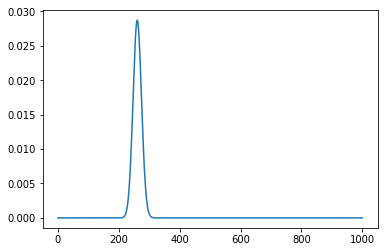

Ekspektasi umur pemain bola kurang dari 22 tahun : 19.557894736842105


In [6]:
# Q1
under22 = len(dataframe[dataframe["Age"] < 22])
complement = len(dataframe[dataframe["Age"] >= 22])
pmf = binom.pmf(numpy.arange(1001),1000, under22/(under22+complement))
print("Ekspektasi banyak pemain bola baru berumur kurang dari 22 tahun : ",pmf.argmax()) # Kemungkinan tertinggi banyaknya new player yang umur <22 dari 1000 recruit
pylab.plot(numpy.arange(1001),pmf)
plotter.show()

q1 = dataframe.loc[ dataframe["Age"] < 22 ]
# expected value of player younger than 22 y.o. is added is :
ans1 = q1.mean().values[0]
print("Ekspektasi umur pemain bola kurang dari 22 tahun :",ans1)

### Q2.

Ekspektasi 1000 pemain bola baru berumur lebih dari 40 tahun:  0


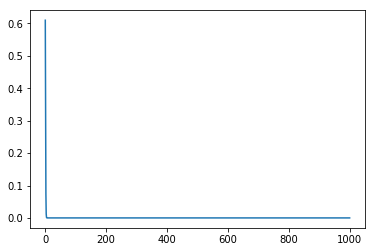

Expected age of new player added above 40 y.o. : 42.22222222222222


In [8]:
# Q2
goal = len(dataframe[dataframe["Age"] > 40])
complement = len(dataframe[dataframe["Age"] <= 40])
pmf = binom.pmf(numpy.arange(1001),1000, goal/(goal+complement))
print("Ekspektasi 1000 pemain bola baru berumur lebih dari 40 tahun: ",pmf.argmax()) # Kemungkinan tertinggi banyaknya new player yang umur <22 dari 1000 recruit
pylab.plot(numpy.arange(1001),pmf)
plotter.show()

q2 = dataframe.loc[ dataframe["Age"] > 40 ]
# expected value of player younger than 22 y.o. is added is :
ans2 = q2.mean().values[0]
print("Expected age of new player added above 40 y.o. :",ans2)

#### PENJELASAN

**ASUMSI:**
1000 data baru diambil dari DATA LUAR namun mengikuti trend dari data yang dimiliki saat ini.

Untuk kasus ini, lebih tepat digunakan distribusi binomial.

**ALASAN:**

Persebaran data bersifat diskrit. Sehingga pilihan terbatas menjadi:
*Bernoulli, Binomial, Hypergeometrik, Poisson, Negative, dan Geometrik*

Trial dilakukan secara berkali-kali sehingga bernoulli distribution tidak cocok.

Pada kasus ini, setiap trial dapat dibagi menjadi dua outcomes, yaitu success dan failure.
Ini merupakan sifat mendasar dari distribusi binomial dan hypergeometric.
CONTOH: banyaknya pemain yang berumur dibawah 25 tahun dari pemilihan 1000 pemain secara random.

Namun, karena pemilihan pemain diambil dari sample data luar dengan mengikuti trend data yang dipunya
sekarang, sehingga mensimulasikan trials dengan replacement sehingga trials bersifat independent.
Probabilitas success akan tidak berubah seiring banyaknya trials. Hal ini menyebabkan syarat binomial terpenuhi.
Sehingga distribusi binomial yang dipilih.